<a href="https://colab.research.google.com/github/Ramilopez99/EjercicioNumpy/blob/main/Ejercicios_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios NumPy

In [ ]:
from PIL import Image
from random import randint
import numpy as np
import matplotlib.pyplot as plt


class OperacionesImg:

    def crearImagen(pixel_x, pixel_y, color):
        data = np.zeros((pixel_x, pixel_y, 3), dtype=np.uint8)
        for i in range(0, data.shape[0]):
            for j in range(0, data.shape[1]):
                data[i, j] = color

        img = Image.fromarray(data)
        return img

    def crearColor():
        return [randint(0, 255), randint(0, 255), randint(0, 255)]

    def crearCollage(ancho, alto, pixel_x, pixel_y):
        for i in range(0, alto):
            for j in range(0, ancho):
                if j == 0:
                    fila = OperacionesImg.crearImagen(pixel_x, pixel_y, OperacionesImg.crearColor())
                else:
                    fila = np.hstack((fila, OperacionesImg.crearImagen(pixel_x, pixel_y, OperacionesImg.crearColor())))
            if i == 0:
                collage = fila
            else:
                collage = np.vstack((collage, fila))

        img = Image.fromarray(collage)
        return img

    def redimensionar(img, ancho, alto):
        img = img.resize((ancho, alto))
        return img

    def redimensionarAncho(img, ancho):
        alto = int((ancho * img.height) / img.width)
        img = OperacionesImg.redimensionar(img, ancho, alto)
        return img

    def redimensionarAlto(img, alto):
        ancho = int((alto * img.width) / img.height)
        img = OperacionesImg.redimensionar(img, ancho, alto)
        return img

    def recorte(img, pos_x, pos_y, ancho, alto):
        img = np.asanyarray(img)
        img_width = img.shape[1]
        img_height = img.shape[0]

        if pos_x+ancho > img_width and pos_y+alto > img_height:
            collage = img[pos_y:img_height, pos_x:img_width]
        elif pos_x+ancho > img_width:
            collage = img[pos_y:alto, pos_x:img_width]
        elif pos_y+alto > img_height:
            collage = img[pos_y:img_height, pos_x:ancho]
        else:
            collage = img[pos_y:alto, pos_x:ancho]

        img = Image.fromarray(collage)
        return img
    
    def apilar(orientacion, img1, img2):
        if orientacion == "horizontal":
            if img1.height > img2.height:
                img2 = OperacionesImg.redimensionarAlto(img2, img1.height)
            elif img2.height > img1.height:
                img1 = OperacionesImg.redimensionarAlto(img1, img2.height)

            img1 = np.asanyarray(img1)
            img2 = np.asanyarray(img2)
            img = np.hstack([img1, img2])

        elif orientacion == "vertical":
            if img1.width > img2.width:
                img2 = OperacionesImg.redimensionarAncho(img2, img1.width)
            elif img2.width > img1.width:
                img1 = OperacionesImg.redimensionarAncho(img1, img2.width)

            img1 = np.asanyarray(img1)
            img2 = np.asanyarray(img2)
            img = np.vstack([img1, img2])

        res = Image.fromarray(img)
        return res
    
    def apilarDeforme(orientacion, img1, img2):
        if orientacion == "horizontal":
            if img1.height > img2.height:
                img2 = OperacionesImg.redimensionar(img2, img2.width, img1.height)
            elif img2.height > img1.height:
                img1 = OperacionesImg.redimensionar(img1, img1.width, img2.height)

            img1 = np.asanyarray(img1)
            img2 = np.asanyarray(img2)
            img = np.hstack([img1, img2])

        elif orientacion == "vertical":
            if img1.width > img2.width:
                img2 = OperacionesImg.redimensionar(img2, img1.width, img2.height)
            elif img2.width > img1.width:
                img1 = OperacionesImg.redimensionar(img1, img2.width, img1.height)

            img1 = np.asanyarray(img1)
            img2 = np.asanyarray(img2)
            img = np.vstack([img1, img2])

        res = Image.fromarray(img)
        return res

    def insertarImg(img1, img2, pos_x, pos_y):
        img1 = np.asanyarray(img1)
        img1_width = img1.shape[1]
        img1_height = img1.shape[0]
        copia = np.copy(img1)

        img2 = np.asanyarray(img2)
        img2_width = img2.shape[1]
        img2_height = img2.shape[0]

        if pos_x+img2_width > img1_width and pos_y+img2_height > img1_height:
            copia[pos_y: img1_height, pos_x: img1_width] = img2[0: img1_height - pos_y, 0: img1_width - pos_x]
            
        elif pos_x+img2_width > img1_width:
            copia[pos_y: pos_y + img2_height, pos_x: img1_width] = img2[0: img2_height, 0: img1_width - pos_x]
            
        elif pos_y+img2_height > img1_height:
            copia[pos_y: img1_height, pos_x: pos_x + img2_width] = img2[0: img1_height - pos_y, 0: img2_width]
            
        else:
            copia[pos_y: pos_y + img2_height, pos_x: pos_x + img2_width] = img2[0: img2_height, 0: img2_width]

        copia = Image.fromarray(copia)
        return copia
        
    def insertarImgRedimensionada(img1, img2, pos_x, pos_y, ancho, alto):

        img2 = OperacionesImg.redimensionar(img2, ancho, alto)

        img1 = np.asanyarray(img1)
        img1_width = img1.shape[1]
        img1_height = img1.shape[0]
        copia = np.copy(img1)

        img2 = np.asanyarray(img2)
        img2_width = img2.shape[1]
        img2_height = img2.shape[0]

        if pos_x+img2_width > img1_width and pos_y+img2_height > img1_height:
            copia[pos_y: img1_height, pos_x: img1_width] = img2[0: img1_height - pos_y, 0: img1_width - pos_x]
            
        elif pos_x+img2_width > img1_width:
            copia[pos_y: pos_y + img2_height, pos_x: img1_width] = img2[0: img2_height, 0: img1_width - pos_x]
            
        elif pos_y+img2_height > img1_height:
            copia[pos_y: img1_height, pos_x: pos_x + img2_width] = img2[0: img1_height - pos_y, 0: img2_width]
            
        else:
            copia[pos_y: pos_y + img2_height, pos_x: pos_x + img2_width] = img2[0: img2_height, 0: img2_width]

        copia = Image.fromarray(copia)
        return copia

imagen = OperacionesImg

### a) Implementa un método al que se le pase el ancho y el alto de la imagen y el color de la misma. El método debe devolver la imagen creada.

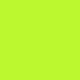

In [ ]:
color = [randint(0, 255), randint(0, 255), randint(0, 255)]
imagen.crearImagen(80, 80, color)

### b) Implementa un método al que se le pasa el número de elementos horizontales y verticales, así como el ancho y el alto de los elementos horizontales y verticales y que devuelva la imagen creada con un color de fondo diferente para cada elemento.

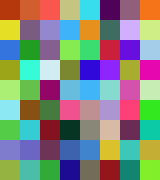

In [ ]:
img = imagen.crearCollage(8, 9, 20, 20)
img

### c) Implementa un método que redimensiona una imagen al ancho y alto especificado, este método deforma la imagen si la relación de aspecto no es la misma.

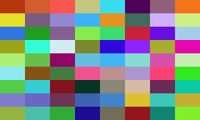

In [ ]:
imagen.redimensionar(img, 200, 120)

### d) Implementa un método que redimensiona una imagen al ancho especificado, sin deformar la imagen.

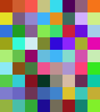

In [ ]:
imagen.redimensionarAncho(img, 100)

### e) Implementa un método que redimensiona una imagen al alto especificado, sin deformar la imagen.

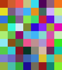

In [ ]:
imagen.redimensionarAlto(img, 70)

### f) Implementa un método que devuelva un trozo de una imagen especificando la posición horizontal y vertical y el ancho y el alto, si las dimensiones especificadas son superiores a la imagen original, debe devolver el recorte disponible.


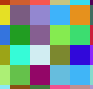

In [ ]:
imagen.recorte(img, 10, 15, 103, 104)

### g) Implementa un método que apile dos imágenes horizontal o verticalmente, sin deformarlas. El método debe especificar en sus argumentos qué dimensiones son las que se deben adaptar.

In [ ]:
img1 = img

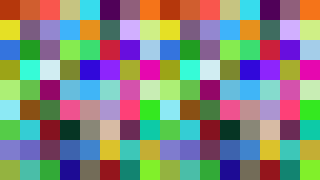

In [ ]:
img1 = imagen.apilar("horizontal", img1, img1)
img1

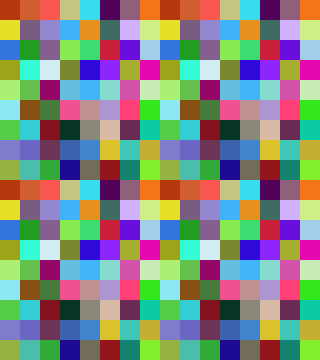

In [ ]:
img1 = imagen.apilar("vertical", img1, img1)
img1

#### Con distintas dimensiones

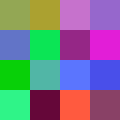

In [ ]:
img1 = imagen.crearCollage(4, 4, 30, 30)
img1

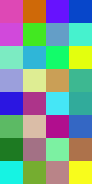

In [ ]:
img2 = imagen.crearCollage(4, 8, 23, 23)
img2

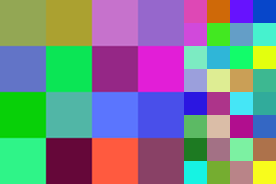

In [ ]:
img3 = imagen.apilar("horizontal", img1, img2)
img3

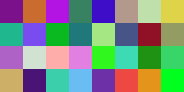

In [ ]:
img2 = imagen.crearCollage(8, 4, 23, 23)
img2


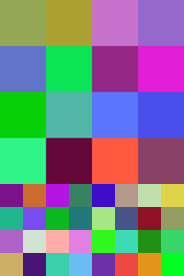

In [ ]:
img3 = imagen.apilar("vertical", img1, img2)
img3

### h) Implementa un método que apile dos imágenes horizontal o verticalmente, si las dimensiones de las imágenes no coinciden, debe adaptarlas a la imagen más ancha o más alta, deformándolas si fuera necesario.

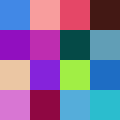

In [ ]:
img1 = imagen.crearCollage(4, 4, 30, 30)
img1

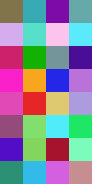

In [ ]:
img2 = imagen.crearCollage(4, 8, 23, 23)
img2


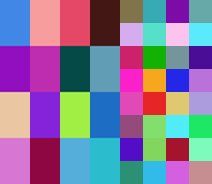

In [ ]:
img3 = imagen.apilarDeforme("horizontal", img1, img2)
img3

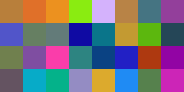

In [ ]:
img2 = imagen.crearCollage(8, 4, 23, 23)
img2

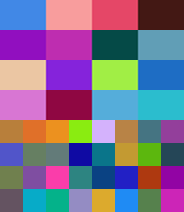

In [ ]:
img3 = imagen.apilarDeforme("vertical", img1, img2)
img3

### i) Implementa un método que inserte una imagen dentro de otra imagen en la posición horizontal y vertical especificada. Si la imagen que se va a insertar no cabe entera, debe recortarla.

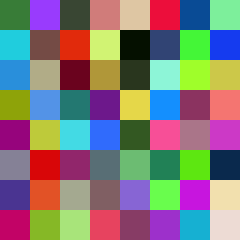

In [ ]:
img1 = imagen.crearCollage(8, 8, 30, 30)
img1

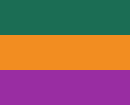

In [ ]:
img2 = imagen.crearCollage(1, 3, 35, 130)
img2

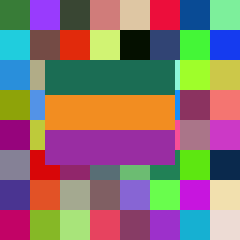

In [ ]:
img3 = imagen.insertarImg(img1, img2, 45, 60)
img3

### j) Implementa un método que inserte dentro de una imagen otra imagen en la posición horizontal y vertical especificada con el ancho y el alto especificado. Si la imagen que se va a insertar no cabe entera, debe recortarla.

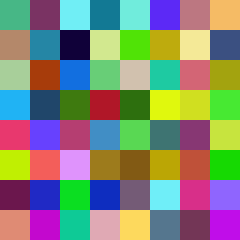

In [ ]:
img1 = imagen.crearCollage(8, 8, 30, 30)
img1

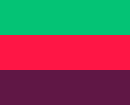

In [ ]:
img2 = imagen.crearCollage(1, 3, 35, 130)
img2

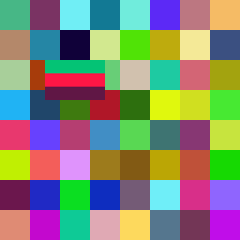

In [ ]:
img3 = imagen.insertarImgRedimensionada(img1, img2, 45, 60, 60,40)
img3